In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## DONNEES

Ce projet concerne le data challenge kaggle "Heart Attack Risk Analysis" situé à l'adresse https://www.kaggle.com/competitions/heart-attack-risk-analysis/data. Toutes les données qui sont utilisées dans ce notebook peuvent y être téléchargées.

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1


In [3]:
test = pd.read_csv('test.csv')
test.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere
1,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,4,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere
2,RQX1211,60,Male,145,160/98,71,1,0,1,0,...,8,5.994228,234966,29.162319,247,7,7,Canada,North America,Northern Hemisphere
3,RVN4963,45,Male,294,130/84,66,0,0,1,1,...,9,7.007392,216565,25.120605,360,4,6,France,Europe,Northern Hemisphere
4,NCU1956,36,Male,133,161/90,97,1,0,1,1,...,10,10.963544,223132,22.386804,605,5,10,Canada,North America,Northern Hemisphere


## VISUALISATION

In [4]:
train.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [5]:
# Split  "/" Data
train[['Up Blood Pressure','Down Blood Pressure']] = train['Blood Pressure'].str.split('/',expand=True)
train

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Up Blood Pressure,Down Blood Pressure
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1,129,90
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1,159,105
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0,161,109
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1,120,62
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1,153,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,BCB2291,29,Female,267,104/105,87,0,0,0,1,...,27.521246,598,4,5,France,Europe,Northern Hemisphere,0,104,105
7006,KIG5207,83,Male,296,134/99,77,1,1,1,1,...,21.332449,465,4,4,United Kingdom,Europe,Northern Hemisphere,0,134,99
7007,GCY1316,54,Male,120,134/84,103,1,1,1,1,...,37.465577,674,6,9,Colombia,South America,Northern Hemisphere,0,134,84
7008,RPK2629,42,Female,147,144/76,81,0,0,1,0,...,28.605789,623,7,10,Spain,Europe,Southern Hemisphere,1,144,76


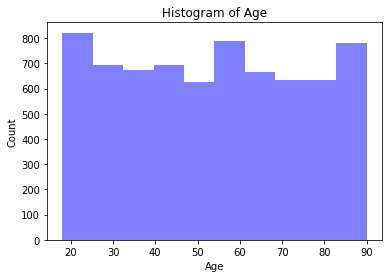

In [6]:
import matplotlib.pyplot as plt

plt.hist(train['Age'], bins=10, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

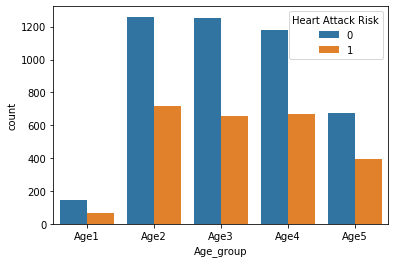

In [7]:
age_split = [0, 20, 40, 60, 80, 1000]
age_label = ['Age1', 'Age2', 'Age3', 'Age4', 'Age5']
train['Age_group'] = pd.cut(train['Age'], bins=age_split, labels=age_label, right=False, include_lowest=True)

sns.countplot(data=train, x='Age_group', hue='Heart Attack Risk')
plt.show()

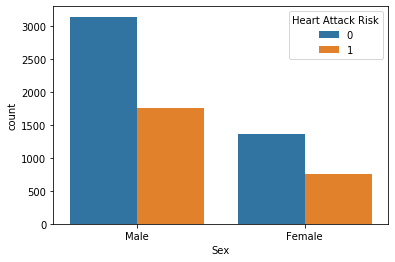

In [8]:
sns.countplot(data=train, x='Sex', hue='Heart Attack Risk')

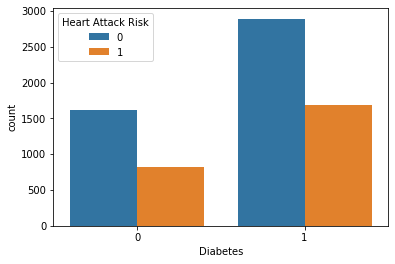

In [9]:
sns.countplot(data=train, x='Diabetes', hue='Heart Attack Risk')

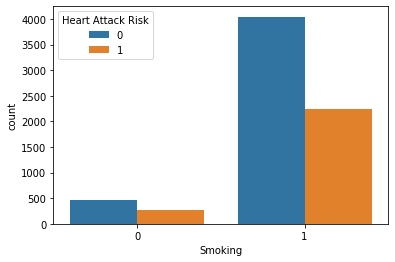

In [10]:
sns.countplot(data=train, x='Smoking', hue='Heart Attack Risk')

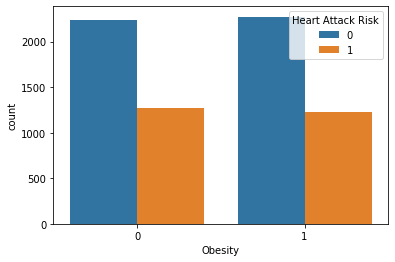

In [11]:
sns.countplot(data=train, x='Obesity', hue='Heart Attack Risk')

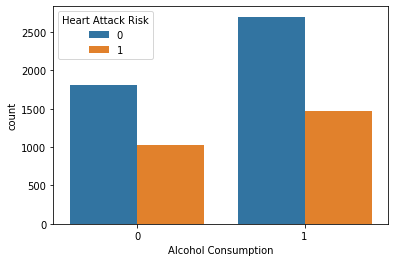

In [12]:
sns.countplot(data=train, x='Alcohol Consumption', hue='Heart Attack Risk')

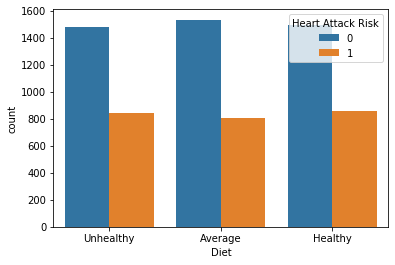

In [13]:
sns.countplot(data=train, x='Diet', hue='Heart Attack Risk')

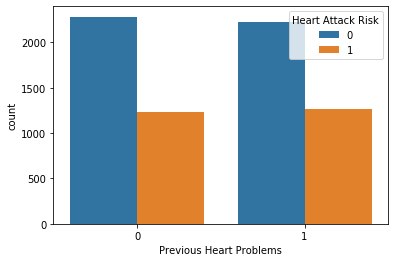

In [14]:
sns.countplot(data=train, x='Previous Heart Problems', hue='Heart Attack Risk')

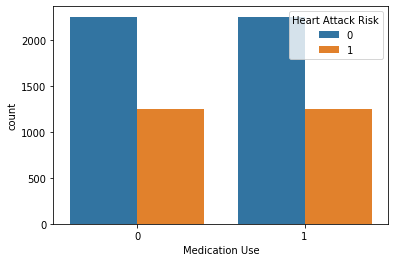

In [15]:
sns.countplot(data=train, x='Medication Use', hue='Heart Attack Risk')

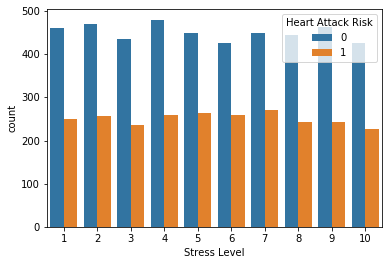

In [16]:
sns.countplot(data=train, x='Stress Level', hue='Heart Attack Risk')

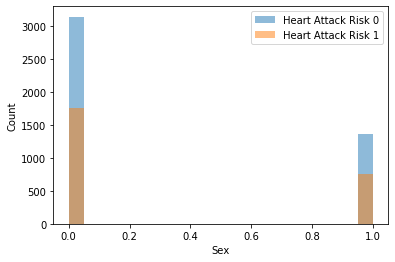

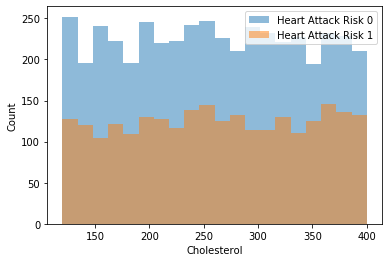

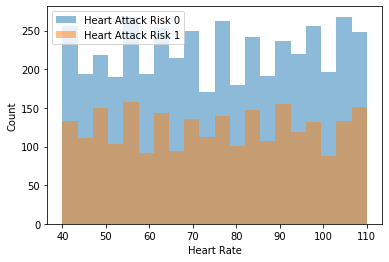

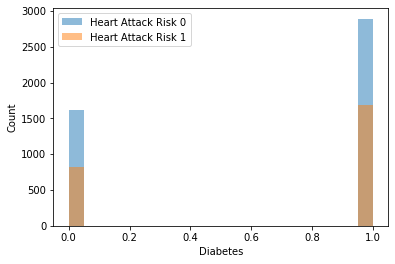

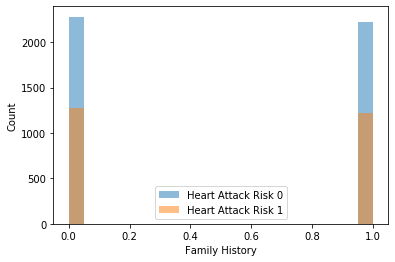

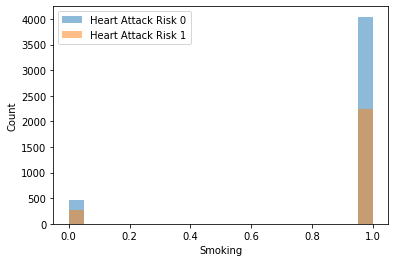

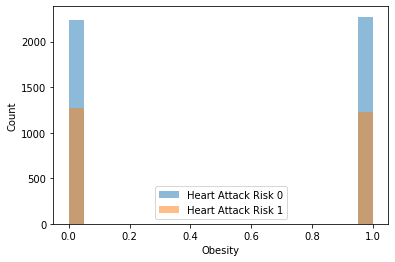

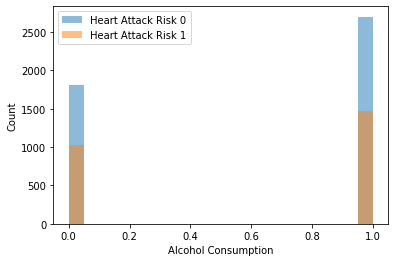

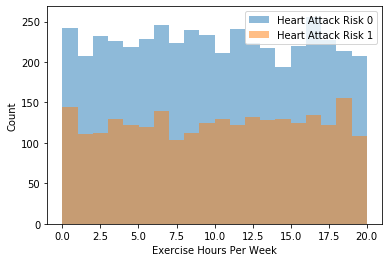

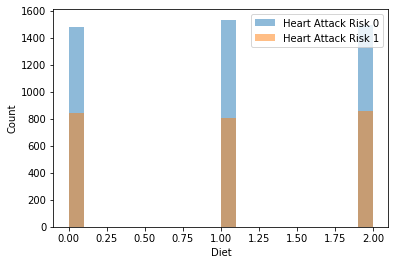

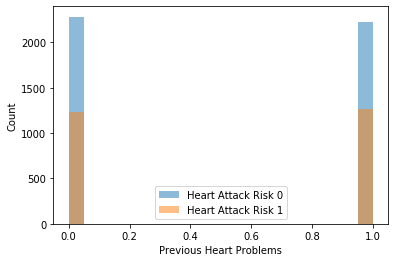

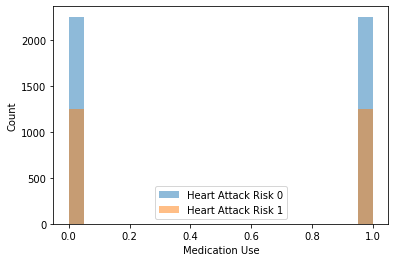

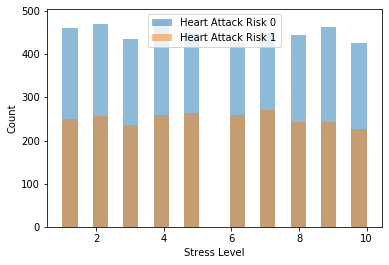

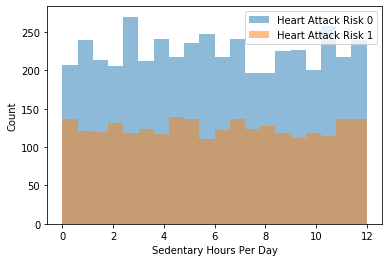

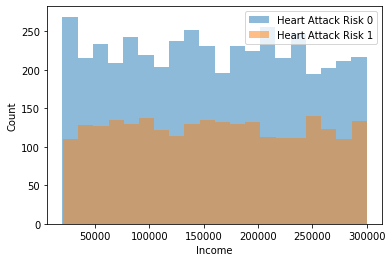

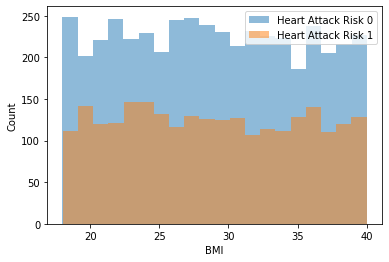

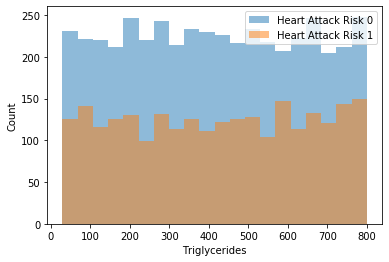

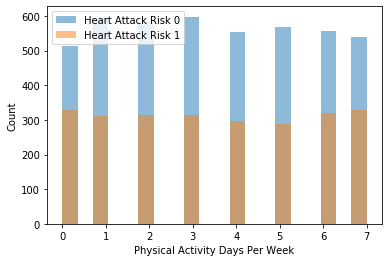

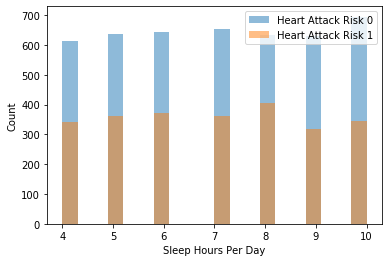

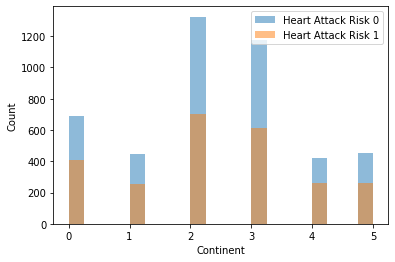

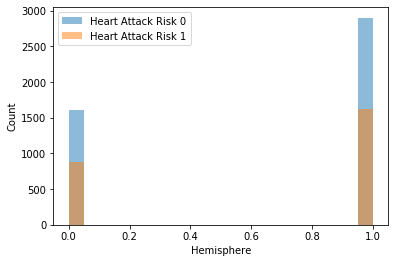

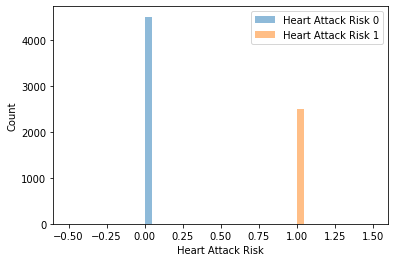

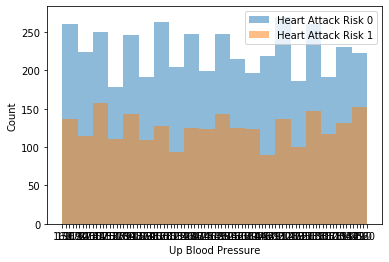

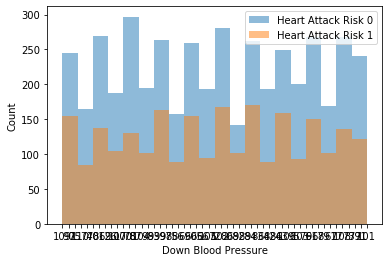

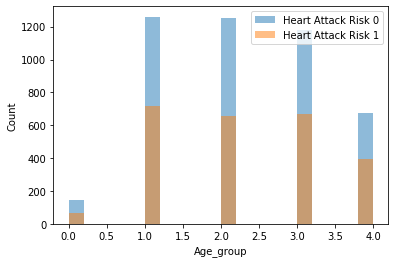

In [40]:
columns = train.columns

# Parcourez toutes les colonnes
for column in columns:
        # Filtrer les données en fonction de la valeur de 'Heart Attack Risk'
        heart_attack_risk_0 = train[train['Heart Attack Risk'] == 0][column]
        heart_attack_risk_1 = train[train['Heart Attack Risk'] == 1][column]

        # Tracer l'histogramme
        plt.hist(heart_attack_risk_0, bins=20, alpha=0.5, label='Heart Attack Risk 0')
        plt.hist(heart_attack_risk_1, bins=20, alpha=0.5, label='Heart Attack Risk 1')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend()
        plt.show()

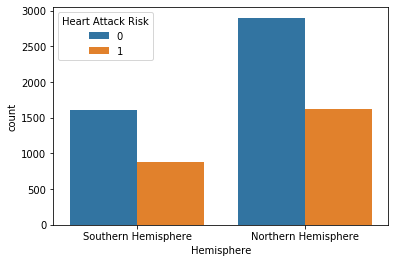

In [18]:
sns.countplot(data=train, x='Hemisphere', hue='Heart Attack Risk')

## PRE PROCESSING

In [19]:
train['Diet'] = train['Diet'].apply(lambda x: 0 if x == 'Unhealthy' else (1 if x == 'Average' else 2))
train['Sex'] = train['Sex'].apply(lambda x: 0 if x == 'Male' else 1)
train['Continent'] = train['Continent'].apply(lambda x: 0 if x == 'South America' else (1 if x == 'Africa' else (2 if x == 'Asia' else (3 if x == 'Europe' else (4 if x == 'North America' else 5)))))
train['Hemisphere'] = train['Hemisphere'].apply(lambda x: 0 if x == 'Southern Hemisphere' else 1)
train['Age_group'] = train['Age_group'].apply(lambda x: 0 if x == 'Age1' else (1 if x == 'Age2' else (2 if x == 'Age3' else (3 if x == 'Age4' else 4))))
train

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Up Blood Pressure,Down Blood Pressure,Age_group
0,RDG0550,33,0,200,129/90,48,0,1,1,1,...,63,6,7,Argentina,0,0,1,129,90,1
1,NMA3851,56,1,262,159/105,46,1,0,1,0,...,333,7,8,Nigeria,1,1,1,159,105,2
2,TUI5807,19,1,140,161/109,54,0,1,0,0,...,537,2,10,Thailand,2,1,0,161,109,0
3,YYT5016,50,1,163,120/62,53,0,1,1,1,...,591,0,9,Spain,3,0,1,120,62,2
4,ZAC5937,89,1,144,153/110,92,1,0,1,0,...,145,2,5,Germany,3,1,1,153,110,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,BCB2291,29,1,267,104/105,87,0,0,0,1,...,598,4,5,France,3,1,0,104,105,1
7006,KIG5207,83,0,296,134/99,77,1,1,1,1,...,465,4,4,United Kingdom,3,1,0,134,99,4
7007,GCY1316,54,0,120,134/84,103,1,1,1,1,...,674,6,9,Colombia,0,1,0,134,84,2
7008,RPK2629,42,1,147,144/76,81,0,0,1,0,...,623,7,10,Spain,3,0,1,144,76,2


In [20]:
train = train.drop(columns=['Patient ID','Blood Pressure','Country','Age'], axis = 1)
train

,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Hemisphere,Heart Attack Risk,Up Blood Pressure,Down Blood Pressure,Age_group
0,0,200,48,0,1,1,1,1,7.807690,0,...,30.449815,63,6,7,0,0,1,129,90,1
1,1,262,46,1,0,1,0,0,17.297628,1,...,34.973685,333,7,8,1,1,1,159,105,2
2,1,140,54,0,1,0,0,1,8.695288,1,...,30.554246,537,2,10,2,1,0,161,109,0
3,1,163,53,0,1,1,1,1,10.161587,2,...,35.390265,591,0,9,3,0,1,120,62,2
4,1,144,92,1,0,1,0,1,16.436787,2,...,39.575483,145,2,5,3,1,1,153,110,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,1,267,87,0,0,0,1,1,15.891827,0,...,27.521246,598,4,5,3,1,0,104,105,1
7006,0,296,77,1,1,1,1,0,5.783338,2,...,21.332449,465,4,4,3,1,0,134,99,4
7007,0,120,103,1,1,1,1,1,7.345259,1,...,37.465577,674,6,9,0,1,0,134,84,2
7008,1,147,81,0,0,1,0,1,10.056501,0,...,28.605789,623,7,10,3,0,1,144,76,2


In [21]:
X= train.drop(columns=["Heart Attack Risk"],axis=1)
y= train["Heart Attack Risk"]

# Modèles

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Best Lasso Parameters:  {'alpha': 1.0}
Best Ridge Parameters:  {'alpha': 1.0}
Rounded Predictions    float64
dtype: object
Rounded Predictions    float64
dtype: object
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       901
           1       0.00      0.00      0.00       501

    accuracy                           0.64      1402
   macro avg       0.32      0.50      0.39      1402
weighted avg       0.41      0.64      0.50      1402

Confusion Matrix for Logistic Regression: 
 [[901   0]
 [501   0]]
Lasso Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       901
           1       0.00      0.00      0.00       501

    accuracy                           0.64      1402
   macro avg       0.32      0.50      0.39      1402
weighted avg       0.41      0.64      0.50      1402

Confusion Matrix for Las

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


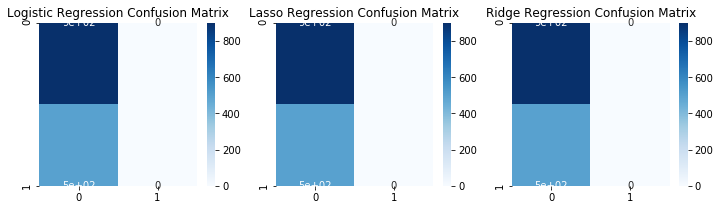

In [39]:
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial')

# Define parameter grids for Lasso and Ridge regression
lasso_params = {'alpha': [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]}
ridge_params = {'alpha': [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]}

# Grid Search to find the best parameters for Lasso and Ridge regression
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)

lasso_grid.fit(X_train, y_train)
ridge_grid.fit(X_train, y_train)

print("Best Lasso Parameters: ", lasso_grid.best_params_)
print("Best Ridge Parameters: ", ridge_grid.best_params_)

# Train models with best parameters
lasso_best = Lasso(alpha=lasso_grid.best_params_['alpha'])
ridge_best = Ridge(alpha=ridge_grid.best_params_['alpha'])

log_reg.fit(X_train, y_train)
lasso_best.fit(X_train, y_train)
ridge_best.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_lasso = lasso_best.predict(X_test)
y_pred_ridge = ridge_best.predict(X_test)

# Round the continuous values in y_pred_lasso and ridge to the nearest integer
y_pred_lasso_rounded = y_pred_lasso.round()
y_pred_ridge_rounded = y_pred_ridge.round()

# Convert the numpy array to a pandas dataframe
y_pred_lasso_rounded_df = pd.DataFrame(y_pred_lasso_rounded, columns=['Rounded Predictions'])
y_pred_ridge_rounded_df = pd.DataFrame(y_pred_ridge_rounded, columns=['Rounded Predictions'])


# Check the updated data types
print(y_pred_ridge_rounded_df.dtypes)
print(y_pred_lasso_rounded_df.dtypes)


# Compare performance using classification report and confusion matrix
print("Logistic Regression Classification Report: \n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix for Logistic Regression: \n", confusion_matrix(y_test, y_pred_log_reg))

print("Lasso Regression Classification Report: \n", classification_report(y_test, y_pred_lasso_rounded_df))
print("Confusion Matrix for Lasso Regression: \n", confusion_matrix(y_test, y_pred_lasso_rounded_df))

print("Lasso Regression Classification Report: \n", classification_report(y_test, y_pred_ridge_rounded_df))
print("Confusion Matrix for Lasso Regression: \n", confusion_matrix(y_test, y_pred_ridge_rounded_df))

# Plot confusion matrices
plt.figure(figsize=(12, 3))

plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(132)
#sns.heatmap(confusion_matrix(y_test, y_pred_lasso), annot=True, cmap='Blues')
sns.heatmap(confusion_matrix(y_test, y_pred_lasso_rounded_df), annot=True, cmap='Blues')

plt.title('Lasso Regression Confusion Matrix')

plt.subplot(133)
#sns.heatmap(confusion_matrix(y_test, y_pred_ridge), annot=True, cmap='Blues')
sns.heatmap(confusion_matrix(y_test, y_pred_ridge_rounded_df), annot=True, cmap='Blues')

plt.title('Ridge Regression Confusion Matrix')

plt.show()